In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt

from models.perceptrons.perceptron_linear import PerceptronLinear
from models.perceptrons.perceptron_non_linear import PerceptronNonLinear 

# Cargar datos
data = pd.read_csv('../res/TP3-ej2-conjunto.csv')
X = data[['x1', 'x2', 'x3']].values
y = data['y'].values

# Escalar los datos
scaler_tanh = MinMaxScaler(feature_range=(-1, 1))  # Tanh models use -1 to 1 range
X_scaled_tanh = scaler_tanh.fit_transform(X)

scaler_sigmoid = MinMaxScaler(feature_range=(0, 1))  # Sigmoid models use 0 to 1 range
X_scaled_sigmoid = scaler_sigmoid.fit_transform(X)

# No scaling for ReLU
scaler_relu = MinMaxScaler(feature_range=(0, 1))  # ReLU models use 0 to 1 range
X_scaled_relu = scaler_relu.fit_transform(X)



# No need to scale the target for metrics calculation
y_scaled_tanh = scaler_tanh.fit_transform(y.reshape(-1, 1)).ravel()
y_scaled_sigmoid = scaler_sigmoid.fit_transform(y.reshape(-1, 1)).ravel()
y_scaled_relu = scaler_relu.fit_transform(y.reshape(-1, 1)).ravel()
# Configuración de la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
epochs = 2000
epochs_for_beta = 50000


perceptron2 = PerceptronNonLinear(
            seed=42,
            num_features=3,
            learning_rate=0.01,
            epsilon=1e-5,
            non_linear_fn='sigmoid',
            beta=20,
            beta_learning_rate=0.1,
            optimizer=True
        )

perceptron2.train(X_scaled_sigmoid, y_scaled_sigmoid, epochs_for_beta)

 
print("last_error", perceptron2.loss_history[-1]) 
print("last_beta", perceptron2.beta_history[-1])


perceptron3 = PerceptronNonLinear(
            seed=42,
            num_features=3,
            learning_rate=0.01,
            epsilon=1e-5,
            non_linear_fn='tanh',
            beta=20,
            beta_learning_rate=0.1,
            optimizer=True
        )

perceptron3.train(X_scaled_tanh, y_scaled_tanh, epochs_for_beta)

print("last_error", perceptron3.loss_history[-1])
print("last_beta", perceptron3.beta_history[-1])


# plot beta history
plt.plot(perceptron2.beta_history)
plt.title('Beta history for sigmoid model')
plt.xlabel('Epoch')
plt.ylabel('Beta')
plt.show()

# plot beta history
plt.plot(perceptron3.beta_history)
plt.title('Beta history for tanh model')
plt.xlabel('Epoch')
plt.ylabel('Beta')
plt.show()


best_beta_sigmoid = perceptron2.beta_history[-1]
best_beta_tanh = perceptron3.beta_history[-1]


non_linear_perceptron_params = [
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 2.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 5.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 5.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 10.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 20.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 30.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 10.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 20.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 50.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 60.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 100.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': best_beta_sigmoid, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': best_beta_tanh, 'num_epochs': epochs},
]

epsilon = 1e-10  # Small constant to avoid division by zero
from tqdm import tqdm
# Loop over the perceptron configurations
for params in tqdm(non_linear_perceptron_params, colour='blue'):
    for train_index, test_index in kf.split(X):
        print(f"Training {params['non_linear_fn'].capitalize()} model with beta={params.get('beta', 'N/A')}")
        if params['non_linear_fn'] == 'tanh':
            X_train, X_test = X_scaled_tanh[train_index], X_scaled_tanh[test_index]
            y_train, y_test = y_scaled_tanh[train_index], y_scaled_tanh[test_index]
        elif params['non_linear_fn'] == 'sigmoid':
            X_train, X_test = X_scaled_sigmoid[train_index], X_scaled_sigmoid[test_index]
            y_train, y_test = y_scaled_sigmoid[train_index], y_scaled_sigmoid[test_index]
        else:  # ReLU
            X_train, X_test = X_scaled_relu[train_index], X_scaled_relu[test_index]
            y_train, y_test = y_scaled_relu[train_index], y_scaled_relu[test_index]  # No scaling for y in ReLU
        # Initialize and train perceptron
        perceptron = PerceptronNonLinear(
            seed=params['seed'],
            num_features=params['num_features'],
            learning_rate=params['learning_rate'],
            epsilon=params['epsilon'],
            non_linear_fn=params['non_linear_fn'],
            beta=params.get('beta', 1),  # Beta is optional for some models like relu
            optimizer=False
        )

        perceptron.train(X_train, y_train, params['num_epochs'])

        # Make predictions
        y_pred = perceptron.predict(X_test)

        # Evaluate model using regression metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100  # Add epsilon to avoid division by zero
        med_ae = median_absolute_error(y_test, y_pred)

        results.append({
            'model': f"{params['non_linear_fn'].capitalize()}-Beta-{params.get('beta', 'N/A')}",
            'mse': mse,
            'mae': mae,
            'r2': r2,
            'rmse': rmse,
            'mape': mape,
            'med_ae': med_ae,
            'entire_perceptron': perceptron
        })
        
# Calculate average metrics for each model
metrics = ['MSE', 'MAE', 'R2', 'RMSE', 'MAPE', 'Median AE']
model_names = list(set([res['model'] for res in results]))

In [ ]:
# Update metrics list to remove 'MAPE'
metrics = ['MSE', 'MAE', 'R2']  # Removed MAPE
key_map = {'MSE': 'mse', 'MAE': 'mae', 'R2': 'r2'}

# Function to extract the beta value for sorting
def extract_beta(model_name):
    # Extract beta from model name (assumes format "Activation-Beta-X")
    try:
        beta_str = model_name.split('-Beta-')[-1]
        return float(beta_str) if beta_str != 'N/A' else float('inf')  
    except ValueError:
        return float('inf')  # Handle any unexpected cases with a fallback

# Sort model names first by function, then by beta value
model_names_sorted = sorted(model_names, key=lambda x: (x.split('-')[0], extract_beta(x)))

average_metrics = {model: {key_map[metric]: np.mean([res[key_map[metric]] for res in results if res['model'] == model]) for metric in metrics} for model in model_names_sorted}

# Increase space between bars by adding a larger offset
x = np.arange(len(metrics)) * 2  # Increasing the space between the label locations
width = 0.15  # The width of the bars

# Now normalize the metrics for a second graph
max_values = {metric: max([average_metrics[model][key_map[metric]] for model in model_names_sorted]) for metric in metrics}
normalized_metrics = {model: {key_map[metric]: average_metrics[model][key_map[metric]] / max_values[metric] for metric in metrics} for model in model_names_sorted}

# Increase space between bars for normalized graph
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(metrics)) * 3  # Again increasing the space between metrics

for i, model in enumerate(model_names_sorted):
    normalized_values = [normalized_metrics[model][key_map[metric]] for metric in metrics]
    ax.bar(x + i * width, normalized_values, width, label=model)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Performance Comparison: Multiple Non-Linear Perceptrons (Normalized)')
ax.set_xticks(x + width * (len(model_names_sorted) / 2))
ax.set_xticklabels(metrics)
ax.legend()

# Display the normalized graph
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt

from models.perceptrons.perceptron_linear import PerceptronLinear
from models.perceptrons.perceptron_non_linear import PerceptronNonLinear 

# Cargar datos
data = pd.read_csv('../res/TP3-ej2-conjunto.csv')
X = data[['x1', 'x2', 'x3']].values
y = data['y'].values

# Escalar los datos
scaler_tanh = MinMaxScaler(feature_range=(-1, 1))  # Tanh models use -1 to 1 range
X_scaled_tanh = scaler_tanh.fit_transform(X)

scaler_sigmoid = MinMaxScaler(feature_range=(0, 1))  # Sigmoid models use 0 to 1 range
X_scaled_sigmoid = scaler_sigmoid.fit_transform(X)

# No scaling for ReLU
scaler_relu = MinMaxScaler(feature_range=(0, 1))  # ReLU models use 0 to 1 range
X_scaled_relu = scaler_relu.fit_transform(X)

# No need to scale the target for metrics calculation
y_scaled_tanh = scaler_tanh.fit_transform(y.reshape(-1, 1)).ravel()
y_scaled_sigmoid = scaler_sigmoid.fit_transform(y.reshape(-1, 1)).ravel()
y_scaled_relu = scaler_relu.fit_transform(y.reshape(-1, 1)).ravel()
num_epochs = 100000

perceptron2 = PerceptronNonLinear(
            seed=42,
            num_features=3,
            learning_rate=0.01,
            epsilon=1e-5,
            non_linear_fn='sigmoid',
            beta=10,
            beta_learning_rate=0.01,
            optimizer=True
        )

perceptron2.train(X_scaled_sigmoid, y_scaled_sigmoid, num_epochs)

 
print("last_error", perceptron2.loss_history[-1]) 
print("last_beta", perceptron2.beta_history[-1])


perceptron3 = PerceptronNonLinear(
            seed=42,
            num_features=3,
            learning_rate=0.01,
            epsilon=1e-5,
            non_linear_fn='tanh',
            beta=20,
            beta_learning_rate=0.01,
            optimizer=True
        )

perceptron3.train(X_scaled_tanh, y_scaled_tanh, num_epochs)

print("last_error", perceptron3.loss_history[-1])
print("last_beta", perceptron3.beta_history[-1])



# plot beta history
plt.plot(perceptron2.beta_history)
plt.title('Beta history for sigmoid model')
plt.xlabel('Epoch')
plt.ylabel('Beta')
plt.show()

# plot beta history
plt.plot(perceptron3.beta_history)
plt.title('Beta history for tanh model')
plt.xlabel('Epoch')
plt.ylabel('Beta')
plt.show()


Perceptron did not converge in 1000 epochs with error 0.00032244765632305326
last_error 0.00032244765632305326
last_beta 6.871562281223657
Perceptron did not converge in 1000 epochs with error 0.016317467420748615
last_error 0.016317467420748615
last_beta 11.673612956338632


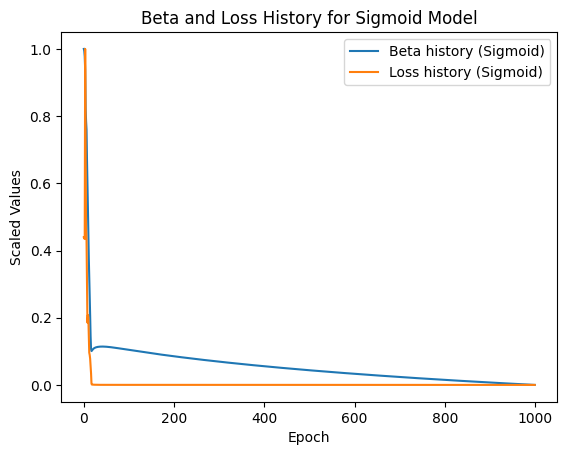

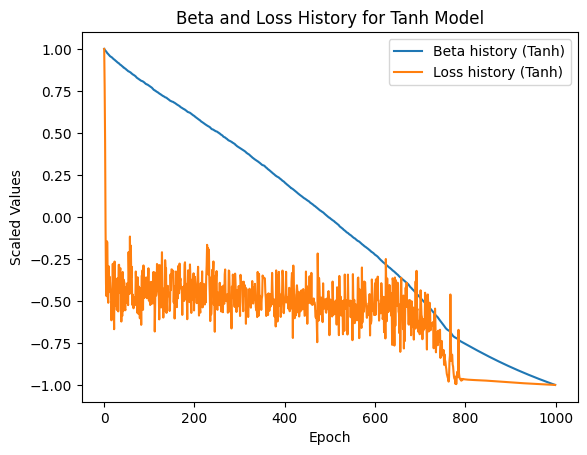

In [5]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt

from models.perceptrons.perceptron_linear import PerceptronLinear
from models.perceptrons.perceptron_non_linear import PerceptronNonLinear 

# Cargar datos
data = pd.read_csv('../res/TP3-ej2-conjunto.csv')
X = data[['x1', 'x2', 'x3']].values
y = data['y'].values

# Escalar los datos
scaler_tanh = MinMaxScaler(feature_range=(-1, 1))  # Tanh models use -1 to 1 range
X_scaled_tanh = scaler_tanh.fit_transform(X)

scaler_sigmoid = MinMaxScaler(feature_range=(0, 1))  # Sigmoid models use 0 to 1 range
X_scaled_sigmoid = scaler_sigmoid.fit_transform(X)

# No scaling for ReLU
scaler_relu = MinMaxScaler(feature_range=(0, 1))  # ReLU models use 0 to 1 range
X_scaled_relu = scaler_relu.fit_transform(X)

# No need to scale the target for metrics calculation
y_scaled_tanh = scaler_tanh.fit_transform(y.reshape(-1, 1)).ravel()
y_scaled_sigmoid = scaler_sigmoid.fit_transform(y.reshape(-1, 1)).ravel()
y_scaled_relu = scaler_relu.fit_transform(y.reshape(-1, 1)).ravel()
num_epochs = 1000

perceptron2 = PerceptronNonLinear(
            seed=42,
            num_features=3,
            learning_rate=0.01,
            epsilon=1e-5,
            non_linear_fn='sigmoid',
            beta=20,
            beta_learning_rate=1,
            optimizer=True
        )

perceptron2.train(X_scaled_sigmoid, y_scaled_sigmoid, num_epochs)

 
print("last_error", perceptron2.loss_history[-1]) 
print("last_beta", perceptron2.beta_history[-1])


perceptron3 = PerceptronNonLinear(
            seed=42,
            num_features=3,
            learning_rate=0.01,
            epsilon=1e-5,
            non_linear_fn='tanh',
            beta=20,
            beta_learning_rate=0.01,
            optimizer=True
        )

perceptron3.train(X_scaled_tanh, y_scaled_tanh, num_epochs)

print("last_error", perceptron3.loss_history[-1])
print("last_beta", perceptron3.beta_history[-1])



scaler_sigmoid = MinMaxScaler(feature_range=(0, 1))
beta_history_sigmoid_scaled = scaler_sigmoid.fit_transform(np.array(perceptron2.beta_history).reshape(-1, 1))
loss_history_sigmoid_scaled = scaler_sigmoid.fit_transform(np.array(perceptron2.loss_history).reshape(-1, 1))

# Plot beta and loss history for sigmoid model
plt.plot(beta_history_sigmoid_scaled, label='Beta history (Sigmoid)')
plt.plot(loss_history_sigmoid_scaled, label='Loss history (Sigmoid)')
plt.title('Beta and Loss History for Sigmoid Model')
plt.xlabel('Epoch')
plt.ylabel('Scaled Values')
plt.legend()  # Adding a legend for clarity
plt.show()

# Reshape beta_history and loss_history to 2D arrays for MinMaxScaler
beta_history_tanh_scaled = scaler_tanh.fit_transform(np.array(perceptron3.beta_history).reshape(-1, 1))
loss_history_tanh_scaled = scaler_tanh.fit_transform(np.array(perceptron3.loss_history).reshape(-1, 1))

# Plot beta and loss history for tanh model
plt.plot(beta_history_tanh_scaled, label='Beta history (Tanh)')
plt.plot(loss_history_tanh_scaled, label='Loss history (Tanh)')
plt.title('Beta and Loss History for Tanh Model')
plt.xlabel('Epoch')
plt.ylabel('Scaled Values')
plt.legend()  # Adding a legend for clarity
plt.show()